In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle as pkl

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

### Understanding data

In [3]:
df.sample(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7588,Plot Area,Ready To Move,Hormavu,4 Bedroom,Prageta,3500,4.0,1.0,289.0
9678,Super built-up Area,Ready To Move,Gubbalala,2 BHK,NaN,1060,2.0,1.0,46.0
5967,Super built-up Area,18-Apr,Marenahalli,1 BHK,NaN,840,1.0,0.0,75.0


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.duplicated().sum()

529

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.area_type.value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

In [9]:
df.drop(columns=['area_type','society','balcony','availability'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12790 non-null  object 
 1   size        12775 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12718 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


### Feature Engineering

In [11]:
def clean(x):
    if pd.isna(x):
        return
    return int(x.split()[0])

In [12]:
df['bed'] = df['size'].apply(clean)

In [13]:
df.bed

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13314    3.0
13315    5.0
13316    4.0
13317    2.0
13318    4.0
Name: bed, Length: 12791, dtype: float64

In [14]:
df.total_sqft.sample(10)

10546    1100
12330    1260
5990     2420
8574      850
4265      750
181      1700
2448     1160
7611      900
7652     1200
9266     1700
Name: total_sqft, dtype: object

In [15]:
def clean2(x):
    if "-" in x:
        a = x.split(" - ")
        return (float(a[0])+float(a[1]))/2
    a = re.search(r'\d+.\d+|\d+',x)
    return float(a.group())

In [16]:
df['area'] = df.total_sqft.apply(clean2)

In [17]:
s = df.location.value_counts()[df.location.value_counts() <= 10].index

In [18]:
df['location'] = df.location.apply(lambda x : 'other' if x in s else x)

In [19]:
df.location.value_counts()

location
other               2948
Whitefield           523
Sarjapur  Road       379
Electronic City      287
Kanakpura Road       249
                    ... 
Doddakallasandra      11
LB Shastri Nagar      11
Thyagaraja Nagar      11
HAL 2nd Stage         11
Nehru Nagar           11
Name: count, Length: 234, dtype: int64

In [20]:
df['price_per_sqft'] = df.price*100000/df.area

In [21]:
df['avg_bed_area'] = df.area/df.bed

### EDA

[]

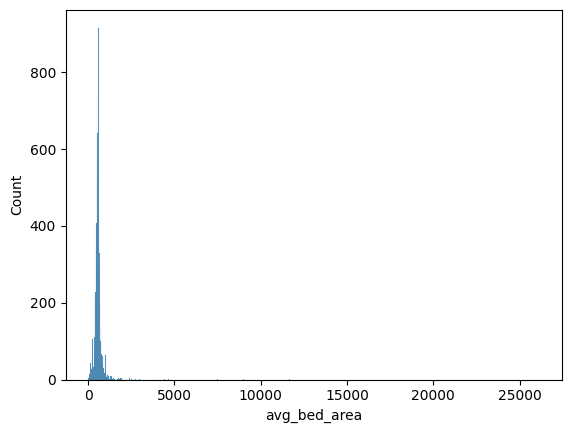

In [22]:
sns.histplot(df.avg_bed_area)
plt.plot()

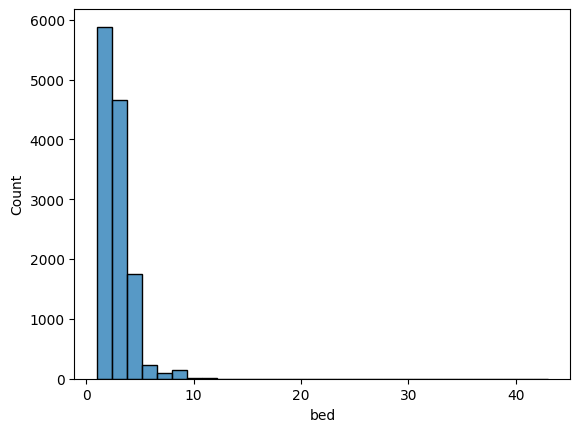

In [23]:
sns.histplot(df.bed,bins=30)
plt.show()

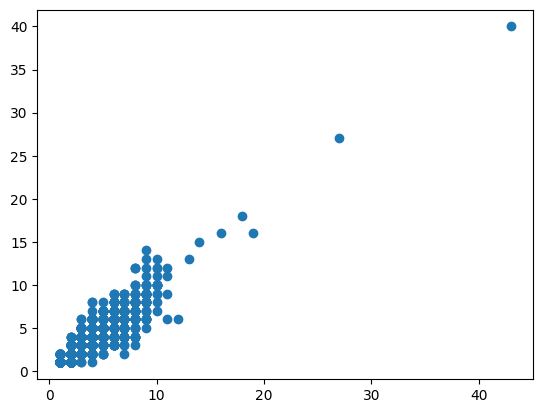

In [24]:
plt.scatter(df.bed,df.bath)
plt.show()

<Axes: xlabel='area', ylabel='Count'>

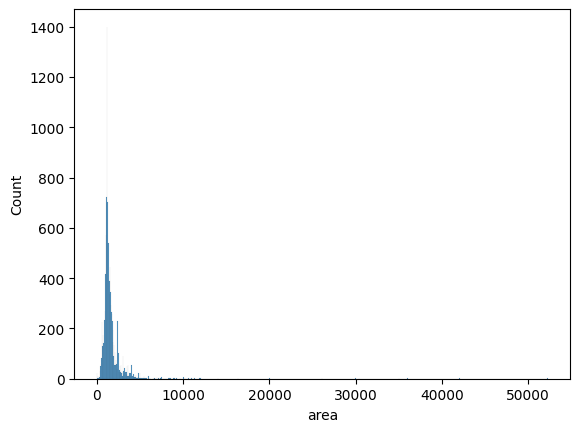

In [25]:
sns.histplot(df.area)

<Axes: xlabel='area', ylabel='Count'>

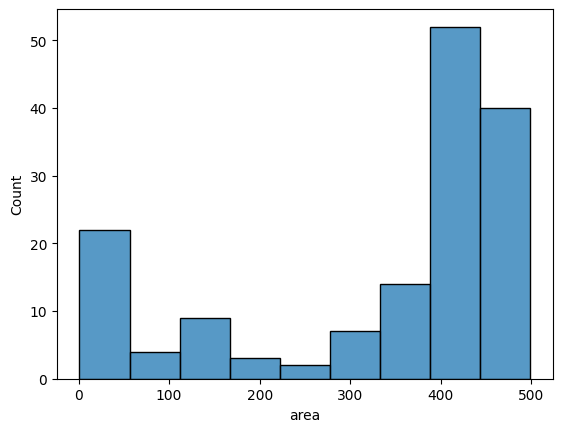

In [26]:
sns.histplot(df[df.area<500].area)

<Axes: ylabel='Count'>

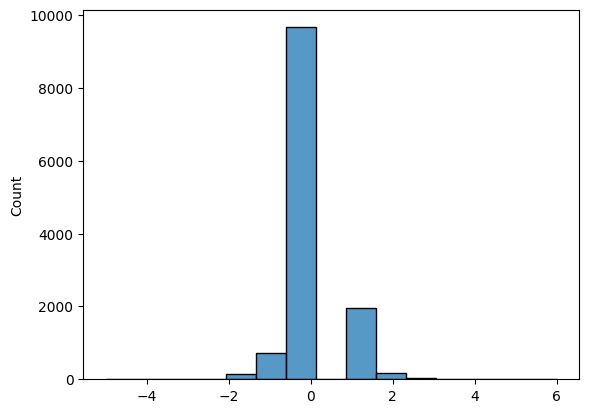

In [27]:
sns.histplot(df.bed-df.bath)

In [28]:
# sns.histplot(df.price_per_sqft)
# plt.show()

In [29]:
# sns.countplot(data=df,x='location')
# plt.show()

In [30]:
# for key,subdf in df.groupby('location'):
#     sns.histplot(subdf.price_per_sqft)
#     plt.show()

In [31]:
# for loc,locdf in df.groupby('location'):
#     plt.scatter(locdf[locdf.bed==2].area,locdf[locdf.bed==2].price,marker='+')
#     plt.scatter(locdf[locdf.bed==3].area,locdf[locdf.bed==3].price,marker='+')
#     plt.show()

### Data preprocessing

In [32]:
df[df.bed>15]

,location,size,total_sqft,bath,price,bed,area,price_per_sqft,avg_bed_area
1718,other,27 BHK,8000,27.0,230.0,27.0,8000.0,2875.000000,296.296296
3379,other,19 BHK,2000,16.0,490.0,19.0,2000.0,24500.000000,105.263158
3609,other,16 BHK,10000,16.0,550.0,16.0,10000.0,5500.000000,625.000000
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0,2400.0,27500.000000,55.813953
11559,other,18 Bedroom,1200,18.0,200.0,18.0,1200.0,16666.666667,66.666667


In [33]:
df = df[~(df.bed > 15)]

In [34]:
len(df[df.avg_bed_area < 70])

39

In [35]:
len(df[df.avg_bed_area > 2000])

36

In [36]:
len(df[df.area<350])

48

In [37]:
df = df[~((df.area<350) | (df.avg_bed_area < 70) | (df.avg_bed_area > 2000))]

In [38]:
df.shape

(12700, 9)

In [39]:
len(df[df.bed-df.bath > 2])

48

In [40]:
df = df[~(df.bath-df.bed > 2)]

In [41]:
df_out = pd.DataFrame()
for i,locdf in df.groupby('location'):
    m = locdf.price_per_sqft.mean() # mean price of that location
    st = locdf.price_per_sqft.std() # std of that location
    dfnew = locdf[(locdf.price_per_sqft>(m-st)) & (locdf.price_per_sqft<(m+st))]
    df_out = pd.concat([df_out,dfnew],ignore_index=True)

In [42]:
df = df_out

In [43]:
df.shape

(10587, 9)

In [44]:
indexs = []
for loc,locdf in df.groupby('location'): # for each location
    bed_stat = {}  # dict to store mean
    for bed,bdf in locdf.groupby('bed'):  # for each bedroom (count)
         bed_stat[bed] = {
            'mean' : bdf.price_per_sqft.mean(),
            'count': bdf.shape[0]
        }
    
    for bed,bdf in locdf.groupby('bed'):  
        stats = bed_stat.get(bed-1)   # stats of bed room less than that
        if stats and stats['count']>2:  # if bed-1 is not found (bed is least value) in dict it will be false
            a = bdf[bdf.price_per_sqft<stats['mean']].index.values # (taking indexes of outliers)
            indexs.extend(a)

In [45]:
len(indexs)

3618

In [46]:
dff = df.drop(indexs)

In [47]:
dff.shape

(6969, 9)

In [48]:
dff.head()

,location,size,total_sqft,bath,price,bed,area,price_per_sqft,avg_bed_area
1,Devarachikkanahalli,2 BHK,1250,2.0,40.0,2.0,1250.0,3200.000000,625.0
2,Devarachikkanahalli,2 Bedroom,1200,2.0,83.0,2.0,1200.0,6916.666667,600.0
3,Devarachikkanahalli,2 BHK,1170,2.0,40.0,2.0,1170.0,3418.803419,585.0
4,Devarachikkanahalli,3 BHK,1425,2.0,65.0,3.0,1425.0,4561.403509,475.0
5,Devarachikkanahalli,2 BHK,947,2.0,43.0,2.0,947.0,4540.654699,473.5


In [49]:
dff.isnull().sum()

location           0
size               6
total_sqft         0
bath              38
price              0
bed                6
area               0
price_per_sqft     0
avg_bed_area       6
dtype: int64

In [50]:
bed = {}
for loc,locdf in dff.groupby('location'):
    bed[loc] = locdf.bed.median()

In [51]:
a = dff[dff.bed.isnull()].index.values
for i in a:
    dff.loc[i,'bed'] = bed[dff.loc[i].location]

In [52]:
a = dff[dff.bath.isnull()].index.values
for i in a:
    dff.loc[i,'bath'] = dff.loc[i,'bed']

In [53]:
dff.isnull().sum()

location          0
size              6
total_sqft        0
bath              0
price             0
bed               0
area              0
price_per_sqft    0
avg_bed_area      6
dtype: int64

<Axes: xlabel='area', ylabel='price'>

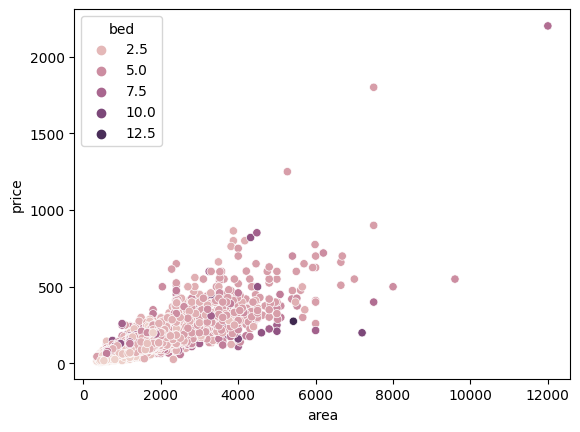

In [54]:
sns.scatterplot(data=dff,x='area',y='price',hue='bed')

In [55]:
dff = dff[~((dff.price > 1000) | (dff.area > 9000))]

In [56]:
dff.head()

,location,size,total_sqft,bath,price,bed,area,price_per_sqft,avg_bed_area
1,Devarachikkanahalli,2 BHK,1250,2.0,40.0,2.0,1250.0,3200.000000,625.0
2,Devarachikkanahalli,2 Bedroom,1200,2.0,83.0,2.0,1200.0,6916.666667,600.0
3,Devarachikkanahalli,2 BHK,1170,2.0,40.0,2.0,1170.0,3418.803419,585.0
4,Devarachikkanahalli,3 BHK,1425,2.0,65.0,3.0,1425.0,4561.403509,475.0
5,Devarachikkanahalli,2 BHK,947,2.0,43.0,2.0,947.0,4540.654699,473.5


In [57]:
y = dff.price

In [59]:
dff.drop(columns=['size','total_sqft','price_per_sqft','price','avg_bed_area'],inplace=True)

In [63]:
dff.head(10)

,location,bath,bed,area
1,Devarachikkanahalli,2.0,2.0,1250.0
2,Devarachikkanahalli,2.0,2.0,1200.0
3,Devarachikkanahalli,2.0,2.0,1170.0
4,Devarachikkanahalli,2.0,3.0,1425.0
5,Devarachikkanahalli,2.0,2.0,947.0
6,Devarachikkanahalli,2.0,2.0,1130.0
7,Devarachikkanahalli,2.0,3.0,1417.0
8,Devarachikkanahalli,2.0,2.0,1230.0
9,Devarachikkanahalli,3.0,3.0,1705.0
10,Devarachikkanahalli,2.0,2.0,1116.0


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
ct = ColumnTransformer(
    transformers=[('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32),[0])],
    remainder='passthrough')

In [73]:
df2 = ct.fit_transform(dff.values)

In [95]:
categories = ct.transformers_[0][1].categories_[0]

In [100]:
categories
with open("description.txt",'w') as f:
    f.write(",".join(categories))

In [74]:
df2.shape

(6965, 237)

In [75]:
data = pd.DataFrame(df2)

In [76]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1250.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1200.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1170.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,3.0,1425.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,947.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1130.0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,3.0,1417.0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1230.0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,3.0,1705.0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,1116.0


In [57]:
# dum = pd.get_dummies(dff,columns=['location'],sparse=False,dtype=np.int32)

In [86]:
# data = dum.drop(columns=['size','total_sqft'])

In [77]:
data['price'] = y.values

In [78]:
data.shape

(6965, 238)

In [79]:
data.to_csv("prepared_data.csv")

In [80]:
pkl.dump(ct,open('ohe.pkl','wb'))